In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

pd.set_option('max.columns', None)

# Import Data

## Import results file

In [2]:
results = pd.read_csv('results.csv', index_col = 0)

results = results[['row', 'plc', 'horseno', 'horse', 'jockey', 'trainer', 'actualwt',
       'declarwt', 'draw', 'lbw', 'runningpos', 'finishtime', 'winodds',
       'date', 'raceno', 'class', 'distance', 'going', 'handicap', 'course',
       'stake', 'venue']]

results.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley


# Convert data into Date, Venue, Course, and Race No. level

In [3]:
text = 'NATURAL EIGHT(S243)'

pattern = re.compile(r'([\w\W]+)?([\(])([A-Z0-9]+)([\)])')

def extract_horse_code(pattern, text):
#     print(text)
    match = re.match(pattern, text)
    return match.group(3)

In [4]:
results['horse_code'] = results['horse'].apply(lambda x: extract_horse_code(pattern, x))
results.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley,S243
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin,T242
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley,S165
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin,T305
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley,P344


In [5]:
#results[results['raceno'] == 1].groupby(['course','raceno']).size()

# results[(results['raceno'] == 1) & (results['date'] == '2015-06-03')].groupby(['venue','course']).size()

results.groupby(['date','venue','course','raceno']).size()


results[(results['course'] == 'TURF - A COURSE') & (results['date'] == '2015-06-03') & (results['raceno'] == 2)]

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
118,0,1,5.0,ROBUST MOMENTUM(P422),C Y Ho,C Fownes,122.0,1209.0,1.0,-,2 3 2 1,1.40.18,2.5,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P422
1232,1,2,1.0,AXIOM(P095),A Suborics,A Schutz,129.0,1088.0,12.0,1,10 10 9 2,1.40.34,82.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P095
2346,2,3,11.0,LIGHTNING AND GOLD(P354),W M Lai,C H Yip,114.0,1034.0,11.0,1-1/4,11 11 10 3,1.40.38,27.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P354
3460,3,4,7.0,CHINA DELIGHT(N148),T H So,K W Lui,121.0,1031.0,2.0,1-1/4,12 12 12 4,1.40.38,13.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N148
4574,4,5,2.0,AMAZING ALWAYS(N432),D Whyte,D E Ferraris,125.0,1133.0,7.0,1-1/4,8 7 8 5,1.40.40,6.8,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N432
5686,5,6,10.0,RED COURAGE(N110),K Teetan,J Size,117.0,1186.0,5.0,2,3 2 3 6,1.40.50,11.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N110
6797,6,7,12.0,DRAGON GLORY(P130),M Chadwick,C W Chang,113.0,1156.0,3.0,2,4 6 4 7,1.40.51,10.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P130
7900,7,8,3.0,CIRCUIT STAR(N220),K C Leung,K L Man,123.0,1054.0,9.0,2,7 8 7 8,1.40.52,30.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N220
9001,8,9,4.0,MAC ROW(N252),M L Yeung,A Lee,122.0,1001.0,8.0,3-3/4,9 9 11 9,1.40.78,9.9,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N252
10092,9,10,8.0,CONFUCIUS SPIRIT(S329),N Callan,S Woods,120.0,1088.0,4.0,5,6 5 6 10,1.40.98,10.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,S329


In [58]:
results = results[results['draw'].notnull()]
results['draw'] = results['draw'].apply(int)

In [59]:
results.groupby(['date','venue','course','raceno']).size().to_frame('count_horse').reset_index()

,date,venue,course,raceno,count_horse
0,2015-06-03,Happy Valley,TURF - A COURSE,1,11
1,2015-06-03,Happy Valley,TURF - A COURSE,2,12
2,2015-06-03,Happy Valley,TURF - A COURSE,3,12
3,2015-06-03,Happy Valley,TURF - A COURSE,4,12
4,2015-06-03,Happy Valley,TURF - A COURSE,5,12
...,...,...,...,...,...
1109,2017-07-16,Sha Tin,TURF - C COURSE,7,14
1110,2017-07-16,Sha Tin,TURF - C COURSE,8,8
1111,2017-07-16,Sha Tin,TURF - C COURSE,9,14
1112,2017-07-16,Sha Tin,TURF - C COURSE,10,12


In [94]:
df = pd.pivot_table(results,
               index = ['date','venue','course','raceno'],
               columns = ['draw'],
               values = ['horse_code','declarwt','winodds','trainer','jockey'],
               aggfunc = max)

In [95]:
df.reset_index(inplace = True)
df.head()

date         venue           course raceno declarwt          \
draw                                                          1       2   
0     2015-06-03  Happy Valley  TURF - A COURSE      1   1037.0  1068.0   
1     2015-06-03  Happy Valley  TURF - A COURSE      2   1209.0  1031.0   
2     2015-06-03  Happy Valley  TURF - A COURSE      3   1052.0  1104.0   
3     2015-06-03  Happy Valley  TURF - A COURSE      4   1073.0  1076.0   
4     2015-06-03  Happy Valley  TURF - A COURSE      5   1058.0  1133.0   

                                                                              \
draw       3       4       5       6       7       8       9      10      11   
0      977.0  1053.0  1075.0  1056.0  1172.0  1154.0  1096.0  1113.0  1025.0   
1     1156.0  1088.0  1186.0  1098.0  1133.0  1001.0  1054.0  1112.0  1034.0   
2     1260.0  1203.0  1130.0  1166.0   996.0  1148.0  1214.0  1177.0  1062.0   
3     1143.0  1135.0  1166.0  1093.0  1157.0  1095.0  1081.0  1007.0  1068.0   
4     1162.0  1052.0  1095.0  1074.0  1081.0  1135.0  1039.0  1065.0  1099.0   

                     horse_code                                            \
draw      12  13  14          1     2     3     4     5     6     7     8   
0        NaN NaN NaN       S243  L251  N186  P331  P175  P204  S075  M406   
1     1088.0 NaN NaN       P422  N148  P130  S329  N110  N099  N432  N252   
2     1095.0 NaN NaN       S445  N265  M273  N055  S086  P308  T072  P088   
3     1189.0 NaN NaN       T163  S224  P213  S104  S349  N193  S330  S170   
4     1164.0 NaN NaN       S137  P016  P371  P418  T069  S157  S254  P444   

                                          jockey                       \
draw     9    10    11    12   13   14         1        2           3   
0     M255  N359  S150   NaN  NaN  NaN    C Y Ho  H W Lai  A Suborics   
1     N220  P139  P354  P095  NaN  NaN    C Y Ho   T H So  M Chadwick   
2     N134  N317  T133  T328  NaN  NaN  K Teetan  G Mosse   K C Leung   
3     L136  S160  S295  N233  NaN  NaN  H N Wong  W M Lai   K C Leung   
4     P064  N295  M026  S051  NaN  NaN    C Y Ho   T H So  M Chadwick   

                                                                           \
draw          4          5           6           7          8           9   
0        T H So    G Mosse    N Callan  M Chadwick  B Prebble  N Rawiller   
1      N Callan   K Teetan  N Rawiller     D Whyte  M L Yeung   K C Leung   
2     O Doleuze     D Lane   M L Yeung  N Rawiller    W M Lai   B Prebble   
3     Y T Cheng    G Mosse     D Whyte   B Prebble   K Teetan      D Lane   
4      N Callan  Y T Cheng     W M Lai     H W Lai    D Whyte  A Suborics   

                                                     trainer           \
draw          10          11          12   13   14         1        2   
0         D Lane     D Whyte         NaN  NaN  NaN  C Fownes    A Lee   
1        H W Lai     W M Lai  A Suborics  NaN  NaN  C Fownes  K W Lui   
2         T H So    N Callan  A Suborics  NaN  NaN    J Size  S Woods   
3     A Suborics  M Chadwick    N Callan  NaN  NaN  Y S Tsui   T K Ng   
4      B Prebble  N Rawiller     G Mosse  NaN  NaN  C Fownes  S Woods   

                                                                              \
draw          3         4            5             6             7         8   
0      A Schutz      L Ho      K L Man        D Cruz      A S Cruz  T P Yung   
1     C W Chang   S Woods       J Size        W Y So  D E Ferraris     A Lee   
2        D Cruz      L Ho  A T Millard  P O'Sullivan        W Y So   C H Yip   
3       J Moore    W Y So     A S Cruz        D Cruz      R Gibson    J Size   
4      C S Shum  A S Cruz      K L Man   A T Millard  D E Ferraris  D J Hall   

                                                              winodds        \
draw         9           10            11        12   13   14       1     2   
0       T K Ng  A T Millard  D E Ferraris       NaN  NaN  NaN     3.5  18.0   
1      K L Man     C S 

In [96]:
new_columns = []
for w in df.columns:
    if w[0] == 'horse_code':
        text = 'horse' + '_' + str(w[1])
    elif w[0] in ('date','venue','course','raceno'):
        text = w[0] + str(w[1])
    else:    
        text = w[0] + '_' + str(w[1])    
    new_columns.append(text)

# new_columns

In [97]:
df.columns = new_columns

df.head()

In [99]:
df.fillna('N/A', inplace = True)

df

,date,venue,course,raceno,declarwt_1,declarwt_2,declarwt_3,declarwt_4,declarwt_5,declarwt_6,declarwt_7,declarwt_8,declarwt_9,declarwt_10,declarwt_11,declarwt_12,declarwt_13,declarwt_14,horse_1,horse_2,horse_3,horse_4,horse_5,horse_6,horse_7,horse_8,horse_9,horse_10,horse_11,horse_12,horse_13,horse_14,jockey_1,jockey_2,jockey_3,jockey_4,jockey_5,jockey_6,jockey_7,jockey_8,jockey_9,jockey_10,jockey_11,jockey_12,jockey_13,jockey_14,trainer_1,trainer_2,trainer_3,trainer_4,trainer_5,trainer_6,trainer_7,trainer_8,trainer_9,trainer_10,trainer_11,trainer_12,trainer_13,trainer_14,winodds_1,winodds_2,winodds_3,winodds_4,winodds_5,winodds_6,winodds_7,winodds_8,winodds_9,winodds_10,winodds_11,winodds_12,winodds_13,winodds_14
0,2015-06-03,Happy Valley,TURF - A COURSE,1,1037,1068,977,1053,1075,1056,1172,1154,1096,1113,1025,N/A,N/A,N/A,S243,L251,N186,P331,P175,P204,S075,M406,M255,N359,S150,N/A,N/A,N/A,C Y Ho,H W Lai,A Suborics,T H So,G Mosse,N Callan,M Chadwick,B Prebble,N Rawiller,D Lane,D Whyte,N/A,N/A,N/A,C Fownes,A Lee,A Schutz,L Ho,K L Man,D Cruz,A S Cruz,T P Yung,T K Ng,A T Millard,D E Ferraris,N/A,N/A,N/A,3.5,18,8.6,7.2,6.6,4.5,21,15,13,49,19,N/A,N/A,N/A
1,2015-06-03,Happy Valley,TURF - A COURSE,2,1209,1031,1156,1088,1186,1098,1133,1001,1054,1112,1034,1088,N/A,N/A,P422,N148,P130,S329,N110,N099,N432,N252,N220,P139,P354,P095,N/A,N/A,C Y Ho,T H So,M Chadwick,N Callan,K Teetan,N Rawiller,D Whyte,M L Yeung,K C Leung,H W Lai,W M Lai,A Suborics,N/A,N/A,C Fownes,K W Lui,C W Chang,S Woods,J Size,W Y So,D E Ferraris,A Lee,K L Man,C S Shum,C H Yip,A Schutz,N/A,N/A,2.5,13,10,10,11,10,6.8,9.9,30,38,27,82,N/A,N/A
2,2015-06-03,Happy Valley,TURF - A COURSE,3,1052,1104,1260,1203,1130,1166,996,1148,1214,1177,1062,1095,N/A,N/A,S445,N265,M273,N055,S086,P308,T072,P088,N134,N317,T133,T328,N/A,N/A,K Teetan,G Mosse,K C Leung,O Doleuze,D Lane,M L Yeung,N Rawiller,W M Lai,B Prebble,T H So,N Callan,A Suborics,N/A,N/A,J Size,S Woods,D Cruz,L Ho,A T Millard,P O'Sullivan,W Y So,C H Yip,Y S Tsui,A Lee,P F Yiu,C Fownes,N/A,N/A,3.9,15,6,10,99,5.6,22,99,4.6,11,14,51,N/A,N/A
3,2015-06-03,Happy Valley,TURF - A COURSE,4,1073,1076,1143,1135,1166,1093,1157,1095,1081,1007,1068,1189,N/A,N/A,T163,S224,P213,S104,S349,N193,S330,S170,L136,S160,S295,N233,N/A,N/A,H N Wong,W M Lai,K C Leung,Y T Cheng,G Mosse,D Whyte,B Prebble,K Teetan,D Lane,A Suborics,M Chadwick,N Callan,N/A,N/A,Y S Tsui,T K Ng,J Moore,W Y So,A S Cruz,D Cruz,R Gibson,J Size,T P Yung,C S Shum,P F Yiu,C Fownes,N/A,N/A,8.5,12,4,12,16,3.4,23,15,56,11,43,10,N/A,N/A
4,2015-06-03,Happy Valley,TURF - A COURSE,5,1058,1133,1162,1052,1095,1074,1081,1135,1039,1065,1099,1164,N/A,N/A,S137,P016,P371,P418,T069,S157,S254,P444,P064,N295,M026,S051,N/A,N/A,C Y Ho,T H So,M Chadwick,N Callan,Y T Cheng,W M Lai,H W Lai,D Whyte,A Suborics,B Prebble,N Rawiller,G Mosse,N/A,N/A,C Fownes,S Woods,C S Shum,A S Cruz,K L Man,A T Millard,D E Ferraris,D J Hall,C H Yip,W Y So,D Cruz,T K Ng,N/A,N/A,5.3,15,9,10,4.4,99,14,3,37,38,32,28,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,2017-07-16,Sha Tin,TURF - C COURSE,7,1134,1203,1036,1033,1100,1233,1078,1141,1057,1120,1118,1017,1146,985,S332,A096,A120,S312,V361,T376,T046,V321,T094,V381,A095,A135,A109,V192,J Moreira,A Sanna,N Callan,M F Poon,M L Yeung,H N Wong,K K Chiong,D Whyte,B Prebble,S Clipperton,Z Purton,U Rispoli,C Y Ho,K Teetan,J Size,C H Yip,K L Man,D J Hall,W Y So,A Lee,C S Shum,C W Chang,C Fownes,J Moore,L Ho,Y S Tsui,A S Cruz,D E Ferraris,11,38,4.7,4.3,30,19,23,8.4,16,14,7.2,12,30,30
1110,2017-07-16,Sha Tin,TURF - C COURSE,8,1198,1129,1092,1279,1171,1259,1094,1183,N/A,N/A,N/A,N/A,N/A,N/A,A066,T198,V397,P230,S393,V181,T118,A113,N/A,N/A,N/A,N/A,N/A,N/A,K C Ng,M L Yeung,J Moreira,M F Poon,D Whyte,K Teetan,C Murray,S Clipperton,N/A,N/A

In [100]:
win = pd.pivot_table(results[(results['plc'] == '1') | (results['plc'] == '1 DH')],
               index = ['date','venue','course','raceno'],
               values = ['draw'])

win = win.reset_index().rename(columns = {'draw':'draw_winner'})

In [101]:
win

,date,venue,course,raceno,draw_winner
0,2015-06-03,Happy Valley,TURF - A COURSE,1,1.0
1,2015-06-03,Happy Valley,TURF - A COURSE,2,1.0
2,2015-06-03,Happy Valley,TURF - A COURSE,3,1.0
3,2015-06-03,Happy Valley,TURF - A COURSE,4,6.0
4,2015-06-03,Happy Valley,TURF - A COURSE,5,7.0
...,...,...,...,...,...
1109,2017-07-16,Sha Tin,TURF - C COURSE,7,11.0
1110,2017-07-16,Sha Tin,TURF - C COURSE,8,1.0
1111,2017-07-16,Sha Tin,TURF - C COURSE,9,7.0
1112,2017-07-16,Sha Tin,TURF - C COURSE,10,8.0


## Extracting horse code from the horse name

## Import horse info file

In [14]:
horse_info = pd.read_csv('horse_info.csv', index_col = 0)

horse_info.head()

,horse,country,trainer,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age
0,()(S259),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(C368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A BEAUTIFUL(T421),AUS,W Y So,Bay,Gelding,Sandia Yit Lau Ying Lam & Yit Kwok Leung,PP,64.0,58.0,Bushranger,Anfield,6.0
3,A FAST ONE(S424),AUS,D E Ferraris,Bay,Gelding,Samson Yip Yan Tion & David Vrijmoed,PPG,37.0,40.0,Holy Roman Emperor,Detail,6.0
4,A SHIN HIKARI(V614),JPN,NaN,Grey,Horse,Eishindo Co Ltd,VIS,NaN,NaN,Deep Impact,Catalina,NaN


## Extracting horse code from the horse name

In [104]:
horse_info['horse_code'] = horse_info['horse'].apply(lambda x: extract_horse_code(pattern, x))
horse_info.head()

,horse,country,trainer,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age,horse_code
0,()(S259),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S259
1,(C368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C368
2,A BEAUTIFUL(T421),AUS,W Y So,Bay,Gelding,Sandia Yit Lau Ying Lam & Yit Kwok Leung,PP,64.0,58.0,Bushranger,Anfield,6.0,T421
3,A FAST ONE(S424),AUS,D E Ferraris,Bay,Gelding,Samson Yip Yan Tion & David Vrijmoed,PPG,37.0,40.0,Holy Roman Emperor,Detail,6.0,S424
4,A SHIN HIKARI(V614),JPN,NaN,Grey,Horse,Eishindo Co Ltd,VIS,NaN,NaN,Deep Impact,Catalina,NaN,V614


In [117]:
horse_dim = horse_info[['horse_code','sex','country','age']]

horse_dim.loc[horse_dim['sex'].isnull(), 'sex'] = 'Others'
horse_dim.loc[horse_dim['sex'].isin(["Colt", "Rig", "Horse", "Gelding"]), 'sex'] = 'Male'
horse_dim.loc[horse_dim['sex'].isin(["Mare", "Filly"]), 'sex'] = 'Female'
horse_dim.loc[horse_dim['sex'].isin(["Brown", "Roan", "Grey"]), 'sex'] = 'Others'

horse_dim.loc[~horse_dim['country'].isin(["AUS", "NZ"]), 'country'] = 'Others'

# horse_dim.loc[horse_dim['age'].isnull(), 'age'] = np.mean(horse_dim['age'])
horse_dim['age'] = horse_dim.groupby(['country']).transform(lambda x: x.fillna(x.mean(skipna = True)))

no_horse = pd.DataFrame([['N/A','N/A','N/A',0]],columns = ['horse_code','sex','country','age'])

horse_dim = pd.concat([horse_dim,no_horse]).reset_index(drop = True)

horse_dim

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,horse_code,sex,country,age
0,S259,Others,Others,5.401361
1,C368,Others,Others,5.401361
2,T421,Male,AUS,6.000000
3,S424,Male,AUS,6.000000
4,V614,Male,Others,5.401361
...,...,...,...,...
3936,A221,Male,AUS,4.000000
3937,K180,Male,Others,5.401361
3938,B113,Male,NZ,4.000000
3939,V335,Male,Others,5.401361


In [129]:
dummy = pd.get_dummies(horse_dim[['sex','country']])

horse_dim = pd.merge(horse_dim, dummy, left_index = True, right_index = True)
horse_dim.drop(columns = ['sex','country'], inplace = True)

In [130]:
horse_dim

,horse_code,age,sex_Female,sex_Male,sex_N/A,sex_Others,country_AUS,country_N/A,country_NZ,country_Others
0,S259,5.401361,0,0,0,1,0,0,0,1
1,C368,5.401361,0,0,0,1,0,0,0,1
2,T421,6.000000,0,1,0,0,1,0,0,0
3,S424,6.000000,0,1,0,0,1,0,0,0
4,V614,5.401361,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3936,A221,4.000000,0,1,0,0,1,0,0,0
3937,K180,5.401361,0,1,0,0,0,0,0,1
3938,B113,4.000000,0,1,0,0,0,0,1,0
3939,V335,5.401361,0,1,0,0,0,0,0,1


In [122]:
horse_dynamic_dim = pd.read_csv('horse_dynamic_dim.csv', index_col = 0)
jockey_dim = pd.read_csv('jockey_dim.csv', index_col = 0) 
trainer_dim = pd.read_csv('trainer_dim.csv', index_col = 0)

In [181]:
horse_dynamic_dim.fillna('N/A', inplace = True)
horse_dynamic_dim.replace([np.inf,-np.inf], 0 , inplace = True)
horse_dynamic_dim.replace(-1, 0 , inplace = True)
horse_dynamic_dim.describe()

,appear_cum,win_cum,top3_cum,class,class_change,win_rate,top3_rate,win_rate_pct_change,top3_pct_change
count,13947.000000,13947.000000,13947.000000,13947.000000,13947.000000,13947.000000,13947.000000,13947.000000,13947.000000
mean,5.235176,0.360077,1.688392,3.415430,0.109271,0.007986,0.299492,-0.111619,-0.100752
std,4.535617,0.727041,1.964655,1.078285,0.464691,0.270400,0.400862,0.144841,0.127751
min,0.000000,0.000000,0.000000,0.000000,-4.000000,-0.500000,-0.500000,-0.500000,-0.500000
25%,2.000000,0.000000,0.000000,3.000000,0.000000,-0.111111,0.000000,-0.166667,-0.142857
50%,4.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.200000,-0.066667,-0.071429
75%,8.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.545455,0.000000,0.000000
max,31.000000,6.000000,10.000000,5.000000,4.000000,1.000000,1.000000,0.000000,0.000000


In [178]:
jockey_dim.fillna('N/A', inplace = True)
jockey_dim.replace([np.inf,-np.inf], 0 , inplace = True)
jockey_dim.describe()

,appear_cum,win_cum,top2_cum,top3_cum,win_rate,top2_rate,top3_rate
count,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000
mean,249.345255,21.568978,42.563139,63.350730,0.074620,0.152003,0.230933
std,209.973782,31.405659,52.797622,73.723198,0.072678,0.119786,0.158931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.750000,3.000000,6.000000,11.000000,0.033057,0.084686,0.148372
50%,208.000000,12.000000,27.000000,41.000000,0.055556,0.128642,0.216216
75%,398.500000,29.000000,60.000000,92.000000,0.094154,0.195708,0.292369
max,888.000000,226.000000,347.000000,483.000000,1.000000,1.500000,2.000000


In [176]:
trainer_dim.fillna('N/A', inplace = True)
trainer_dim.replace([np.inf,-np.inf], 0 , inplace = True)
trainer_dim.describe()

,appear_cum,win_cum,top2_cum,top3_cum,win_rate,top2_rate,top3_rate
count,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000
mean,286.861538,23.556561,47.026546,70.524585,0.078512,0.156590,0.234281
std,200.826693,20.193498,37.409975,55.054153,0.068080,0.091285,0.117224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.000000,8.000000,16.000000,24.500000,0.048820,0.115799,0.182393
50%,272.000000,19.000000,41.000000,62.000000,0.071429,0.156818,0.237383
75%,439.000000,35.000000,72.000000,106.000000,0.097517,0.187071,0.276714
max,776.000000,114.000000,204.000000,284.000000,2.000000,2.000000,2.000000


## Create dataset for prediction

In [182]:
pre_df = pd.merge(df, win
    , left_on = ['date','venue','course','raceno']
    , right_on = ['date','venue','course','raceno'])

In [183]:
# Join with Horse Dimension Static

tmp = pd.merge(pre_df, horse_dim,
        left_on = f'horse_1',
        right_on = 'horse_code',
        suffixes = ('',''))

for i in range(2,14):
    tmp = pd.merge(tmp, horse_dim,
    left_on = f'horse_{i}',
    right_on = 'horse_code',
    suffixes = ('',f'_{i}'))

tmp = pd.merge(tmp, horse_dim,
        left_on = f'horse_14',
        right_on = 'horse_code',
        suffixes = ('_1','_14'))

# Join with Horse Dimension Dynamic

tmp = pd.merge(tmp, horse_dynamic_dim,
        left_on = [f'horse_1','date'],
        right_on = ['horse_code','date'],
        suffixes = ('',''))

for i in range(2,14):
    tmp = pd.merge(tmp, horse_dynamic_dim,
    left_on = [f'horse_{i}','date'],
    right_on = ['horse_code','date'],
    suffixes = ('',f'_{i}'))

tmp = pd.merge(tmp, horse_dynamic_dim,
        left_on = [f'horse_14','date'],
        right_on = ['horse_code','date'],
        suffixes = ('_1','_14'))

# Join with Trainer Dimension Dynamic

tmp = pd.merge(tmp, trainer_dim,
        left_on = [f'trainer_1','date'],
        right_on = ['trainer','date'],
        suffixes = ('',''))

for i in range(2,14):
    tmp = pd.merge(tmp, trainer_dim,
    left_on = [f'trainer_{i}','date'],
    right_on = ['trainer','date'],
    suffixes = ('',f'_{i}'))

tmp = pd.merge(tmp, trainer_dim,
        left_on = [f'trainer_14','date'],
        right_on = ['trainer','date'],
        suffixes = ('_1','_14'))

# Join with Jockey Dimension Dynamic

tmp = pd.merge(tmp, jockey_dim,
        left_on = [f'jockey_1','date'],
        right_on = ['jockey','date'],
        suffixes = ('',''))

for i in range(2,14):
    tmp = pd.merge(tmp, jockey_dim,
    left_on = [f'jockey_{i}','date'],
    right_on = ['jockey','date'],
    suffixes = ('',f'_{i}'))

tmp = pd.merge(tmp, jockey_dim,
        left_on = [f'jockey_14','date'],
        right_on = ['jockey','date'],
        suffixes = ('_1','_14'))

dummy2 = pd.get_dummies(tmp[['venue','course']])

tmp = pd.merge(tmp, dummy2, left_index = True, right_index = True)

final = tmp.drop(columns = ['date','venue','course','raceno',
                'horse_1','horse_2','horse_3','horse_4','horse_5','horse_6','horse_7',
                'horse_8', 'horse_9','horse_10','horse_11','horse_12','horse_13','horse_14',
                'horse_code_1','horse_code_2','horse_code_3','horse_code_4','horse_code_5','horse_code_6','horse_code_7',
                'horse_code_8', 'horse_code_9','horse_code_10','horse_code_11','horse_code_12','horse_code_13','horse_code_14',
                'jockey_1','jockey_2','jockey_3','jockey_4','jockey_5','jockey_6','jockey_7',
                'jockey_8','jockey_9','jockey_10','jockey_11','jockey_12','jockey_13','jockey_14',
                'trainer_1','trainer_2','trainer_3','trainer_4','trainer_5','trainer_6','trainer_7',
                'trainer_8','trainer_9','trainer_10','trainer_11','trainer_12','trainer_13','trainer_14'])

final.replace('N/A', 0, inplace = True)

final

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,declarwt_1,declarwt_2,declarwt_3,declarwt_4,declarwt_5,declarwt_6,declarwt_7,declarwt_8,declarwt_9,declarwt_10,declarwt_11,declarwt_12,declarwt_13,declarwt_14,winodds_1,winodds_2,winodds_3,winodds_4,winodds_5,winodds_6,winodds_7,winodds_8,winodds_9,winodds_10,winodds_11,winodds_12,winodds_13,winodds_14,draw_winner,age_1,sex_Female_1,sex_Male_1,sex_N/A_1,sex_Others_1,country_AUS_1,country_N/A_1,country_NZ_1,country_Others_1,age_2,sex_Female_2,sex_Male_2,sex_N/A_2,sex_Others_2,country_AUS_2,country_N/A_2,country_NZ_2,country_Others_2,age_3,sex_Female_3,sex_Male_3,sex_N/A_3,sex_Others_3,country_AUS_3,country_N/A_3,country_NZ_3,country_Others_3,age_4,sex_Female_4,sex_Male_4,sex_N/A_4,sex_Others_4,country_AUS_4,country_N/A_4,country_NZ_4,country_Others_4,age_5,sex_Female_5,sex_Male_5,sex_N/A_5,sex_Others_5,country_AUS_5,country_N/A_5,country_NZ_5,country_Others_5,age_6,sex_Female_6,sex_Male_6,sex_N/A_6,sex_Others_6,country_AUS_6,country_N/A_6,country_NZ_6,country_Others_6,age_7,sex_Female_7,sex_Male_7,sex_N/A_7,sex_Others_7,country_AUS_7,country_N/A_7,country_NZ_7,country_Others_7,age_8,sex_Female_8,sex_Male_8,sex_N/A_8,sex_Others_8,country_AUS_8,country_N/A_8,country_NZ_8,country_Others_8,age_9,sex_Female_9,sex_Male_9,sex_N/A_9,sex_Others_9,country_AUS_9,country_N/A_9,country_NZ_9,country_Others_9,age_10,sex_Female_10,sex_Male_10,sex_N/A_10,sex_Others_10,country_AUS_10,country_N/A_10,country_NZ_10,country_Others_10,age_11,sex_Female_11,sex_Male_11,sex_N/A_11,sex_Others_11,country_AUS_11,country_N/A_11,country_NZ_11,country_Others_11,age_12,sex_Female_12,sex_Male_12,sex_N/A_12,sex_Others_12,country_AUS_12,country_N/A_12,country_NZ_12,country_Others_12,age_13,sex_Female_13,sex_Male_13,sex_N/A_13,sex_Others_13,country_AUS_13,country_N/A_13,country_NZ_13,country_Others_13,age_14,sex_Female_14,sex_Male_14,sex_N/A_14,sex_Others_14,country_AUS_14,country_N/A_14,country_NZ_14,country_Others_14,appear_cum_1,win_cum_1,top3_cum_1,class_1,class_change_1,win_rate_1,top3_rate_1,win_rate_pct_change_1,top3_pct_change_1,appear_cum_2,win_cum_2,top3_cum_2,class_2,class_change_2,win_rate_2,top3_rate_2,win_rate_pct_change_2,top3_pct_change_2,appear_cum_3,win_cum_3,top3_cum_3,class_3,class_change_3,win_rate_3,top3_rate_3,win_rate_pct_change_3,top3_pct_change_3,appear_cum_4,win_cum_4,top3_cum_4,class_4,class_change_4,win_rate_4,top3_rate_4,win_rate_pct_change_4,top3_pct_change_4,appear_cum_5,win_cum_5,top3_cum_5,class_5,class_change_5,win_rate_5,top3_rate_5,win_rate_pct_change_5,top3_pct_change_5,appear_cum_6,win_cum_6,top3_cum_6,class_6,class_change_6,win_rate_6,top3_rate_6,win_rate_pct_change_6,top3_pct_change_6,appear_cum_7,win_cum_7,top3_cum_7,class_7,class_change_7,win_rate_7,top3_rate_7,win_rate_pct_change_7,top3_pct_change_7,appear_cum_8,win_cum_8,top3_cum_8,class_8,class_change_8,win_rate_8,top3_rate_8,win_rate_pct_change_8,top3_pct_change_8,appear_cum_9,win_cum_9,top3_cum_9,class_9,class_change_9,win_rate_9,top3_rate_9,win_rate_pct_change_9,top3_pct_change_9,appear_cum_10,win_cum_10,top3_cum_10,class_10,class_change_10,win_rate_10,top3_rate_10,win_rate_pct_change_10,top3_pct_change_10,appear_cum_11,win_cum_11,top3_cum_11,class_11,class_change_11,win_rate_11,top3_rate_11,win_rate_pct_change_11,top3_pct_change_11,appear_cum_12,win_cum_12,top3_cum_12,class_12,class_change_12,win_rate_12,top3_rate_12,win_rate_pct_change_12,top3_pct_change_12,appear_cum_13,win_cum_13,top3_cum_13,class_13,class_change_13,win_rate_13,top3_rate_13,win_rate_pct_change_13,top3_pct_change_13,appear_cum_14,win_cum_14,top3_cum_14,class_14,class_change_14,win_rate_14,top3_rate_14,win_rate_pct_change_14,top3_pct_change_14,appear_cum_1,win_cum_1,top2_cum_1,top3_cum_1,win_rate_1,top2_rate_1,top3_rate_1,appear_cum_2,win_cum_2,top2_cum_2,top3_cum_2,win_rate_2,top2_rate_2,top3_rate_2,appear_cum_3,win_cum_3,top2_cum_3,top3_cum_3,win_rate_3,top2_rate_3,top3_rate_3,appear_cum_4,win_cum_4,top2_cum_4,top3_cum_4,win_rate_4,top2_rate_4,top3_rate_4,appear_cum_5,win_cum_5,top2_cum_5,top3_

# Running Prediction Models

In [192]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score

In [208]:
x = final.drop(columns='draw_winner')
y = final['draw_winner'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.50, random_state = 1)

y_train.value_counts()

1     57
3     44
5     43
7     42
4     42
2     41
9     39
6     39
10    34
8     33
12    27
11    24
14    14
13    12
Name: draw_winner, dtype: int64

In [209]:
# lr = LogisticRegression()
rf = RandomForestClassifier()

# lr.fit(x_train, y_train)
rf.fit(x_train, y_train)

# y_pred_prob = lr.predict_proba(x_test)
# y_pred = lr.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)
y_pred = rf.predict(x_test)

In [210]:
print(classification_report(y_test, y_pred, digits=5))

precision    recall  f1-score   support

           1    0.52577   0.85000   0.64968        60
           2    0.58537   0.55814   0.57143        43
           3    0.60377   0.76190   0.67368        42
           4    0.61765   0.63636   0.62687        33
           5    0.66000   0.75000   0.70213        44
           6    0.53488   0.63889   0.58228        36
           7    0.61111   0.80488   0.69474        41
           8    0.83333   0.55556   0.66667        36
           9    0.58974   0.58974   0.58974        39
          10    0.73913   0.62963   0.68000        27
          11    0.87500   0.28000   0.42424        25
          12    0.95455   0.50000   0.65625        42
          13    1.00000   0.20000   0.33333        10
          14    0.50000   0.07143   0.12500        14

    accuracy                        0.62602       492
   macro avg    0.68788   0.55904   0.56972       492
weighted avg    0.66612   0.62602   0.61278       492



In [211]:
y_pred_prob[0]

array([0.1 , 0.05, 0.03, 0.18, 0.14, 0.05, 0.02, 0.1 , 0.08, 0.15, 0.04,
       0.04, 0.01, 0.01])

In [212]:
prob_top_k = list()

for k in range(1,15):
    count_in_top_k = 0
    k = k

    for i in range(len(y_pred_prob)):
        indices = list(pd.Series(y_pred_prob[i]).nlargest(k).index + 1)
        if y_test.iloc[i] in indices:
            count_in_top_k += 1
        
    percent_correct = count_in_top_k/len(y_pred_prob)

    prob_top_k.append(percent_correct)

prob_top_k

[0.6260162601626016,
 0.733739837398374,
 0.8048780487804879,
 0.8536585365853658,
 0.8861788617886179,
 0.9065040650406504,
 0.9247967479674797,
 0.9369918699186992,
 0.9471544715447154,
 0.9634146341463414,
 0.9715447154471545,
 0.9898373983739838,
 0.9979674796747967,
 1.0]

In [213]:
normal_odds = [i/14 for i in range(1,15)]
normal_odds

[0.07142857142857142,
 0.14285714285714285,
 0.21428571428571427,
 0.2857142857142857,
 0.35714285714285715,
 0.42857142857142855,
 0.5,
 0.5714285714285714,
 0.6428571428571429,
 0.7142857142857143,
 0.7857142857142857,
 0.8571428571428571,
 0.9285714285714286,
 1.0]

Text(0.5, 1.0, 'Model vs. Luck')

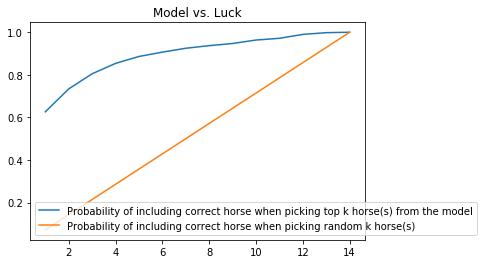

In [214]:
plt.plot([i for i in range(1,15)], prob_top_k)
plt.plot([i for i in range(1,15)], normal_odds)
plt.legend(['Probability of including correct horse when picking top k horse(s) from the model',
            'Probability of including correct horse when picking random k horse(s)'])
plt.title('Model vs. Luck')

In [235]:
importances = sorted(list(zip(rf.feature_importances_,x.columns)), key = lambda x: x[0], reverse = True)

In [239]:
top_k = 20
top = importances[:top_k]

top_imp = [i[0] for i in top]
top_feat = [i[1] for i in top]

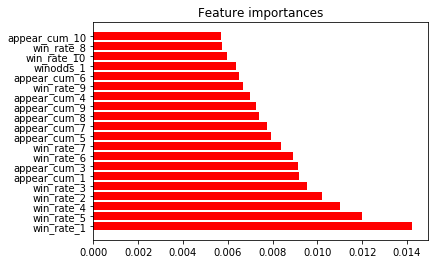

In [247]:
#Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(top_feat, top_imp,
       color="r",align="center")

plt.yticks(rotation = 0)
#Edited here (put top_k)
# plt.xlim([-1, top_k])
plt.show()